# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> André Franco Annunziato</font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [3]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [5]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [6]:
df["Hemisferio"] = np.where(df.Latitude > 0, "Norte", "Sul")
#pd.Series(df.Hemisferio)

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

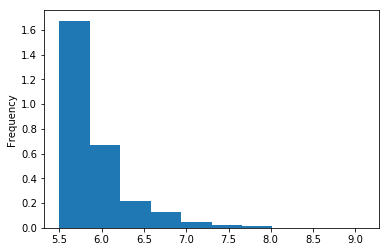

In [7]:
df.Magnitude.plot.hist(normed=True)

É possível perceber que terremotos com magnitudes mais baixas acontecem mais frequentemente.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [8]:
mu = expon.fit(df.Magnitude)[0]
sigma = expon.fit(df.Magnitude)[1]
print(mu,"\n",sigma)

5.49999999967 
 0.382548648851


No caso, o primeiro valor retornado seria a média e o segundo valor seria o desvio padrão.

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

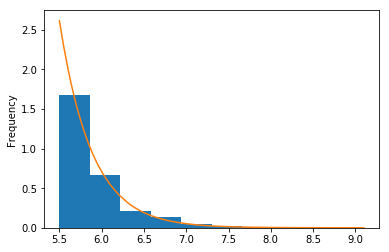

In [9]:
df.Magnitude.plot.hist(normed=True)
plt.plot(sorted(df.Magnitude),expon.pdf(sorted(df.Magnitude), loc = mu, scale = sigma))


A linha plotada pela fdp representa uma linha de tendência da função de probabilidade apresentada, que, portanto, pode ser representada por uma função exponencial.

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [10]:
tab = pd.crosstab(df.Hemisferio, df.Type,normalize = True)
tab

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisferio,,,,
Norte,0.447121,0.000085,0.006279,0.000000
Sul,0.545191,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [11]:
norte = len(df[(df.Type == "Earthquake")&(df.Hemisferio == "Norte")])
total = len(df.Hemisferio)
print("A probabilidade de um terremoto acontecer no hemisfério Norte é de aprox. {0:.2f}%".format(norte/total*100))

A probabilidade de um terremoto acontecer no hemisfério Norte é de aprox. 44.71%


Explique o seu raciocínio

Para este cálculo, foi usado o número de terremotos que aconteceram no hemisfério norte, definido pela variável "norte", dividido pelo número total de terremotos, representado pela varável "total".

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [12]:
prob = df.groupby('Hemisferio').size().div(len(df))
df.groupby(["Type","Hemisferio"]).size().div(len(df)).div(prob,)

Type               Hemisferio
Earthquake         Norte         0.985966
                   Sul           0.997577
Explosion          Norte         0.000188
                   Sul           0.000156
Nuclear Explosion  Norte         0.013846
                   Sul           0.002188
Rock Burst         Sul           0.000078
dtype: float64

Portanto, de acordo com a tabela gerada, a probabilidade de ter ocorrido uma Nuclear Explosion, dado que ocorreu no Norte, é de, aproximadamente 1,38% (0.0138)

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

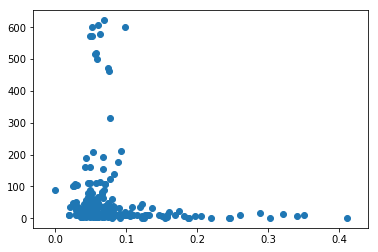

In [13]:
plt.scatter(df["Magnitude Error"], df.Depth)

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [14]:
df.Depth.corr(df["Magnitude Error"])

-0.076918438923387192

Explique o que significa o valor da correlação calculada acima? 

Como o valor é bem próximo de zero, significa que as duas funções têm muito pouco de relação entre si.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [171]:
df.Latitude.describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

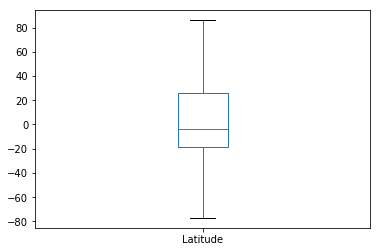

In [173]:
df.Latitude.plot(kind="box")

O boxplot da latitude se mostra bem equilibrado, pois tanto a mediana quanto a média estão proximas do zero, e o desvio padrão não é tão grande se comparado com a longitude.

In [172]:
df.Longitude.describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

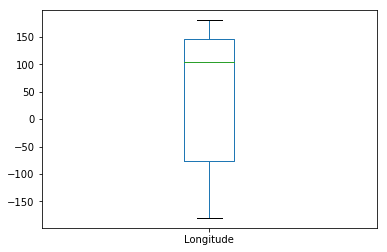

In [174]:
df.Longitude.plot(kind='box')

O tamanho maior da caixa se dá pelo fato de o desvio padrão ser muito elevado (125,51). Isso ocorre provavelmente porque o eixo longitudinal é muito grande. Além disso, o boxplot mostra que os tremores ocorrem com mais frequência no hemisfério leste, já que a média está bem deslocada para a direita (39.63).

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [196]:
norte = len(df[(df["Magnitude Type"] == "MB")&(df.Hemisferio == "Norte")&(df.Type == "Nuclear Explosion")])
sul = len(df[(df["Magnitude Type"] == "MB")&(df.Hemisferio == "Sul")&(df.Type == "Nuclear Explosion")])
total = len(df.Hemisferio)

print("A probabilidade de Nuclear Explosion de Type MB ter ocorrido no Hemisfério Norte é de {0:.2f}% e a de ter ocorrido no Sul é de {1:.2f}%.".format(norte*100/total,sul*100/total))
print("Portanto, é mais provável que tenha acontecido no Hemisfério Norte.")

A probabilidade de Nuclear Explosion de Type MB ter ocorrido no Hemisfério Norte é de 0.58% e a de ter ocorrido no Sul é de 0.12%.
Portanto, é mais provável que tenha acontecido no Hemisfério Norte.
